In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

In [6]:
df = pd.read_csv('./unemployment-rate.csv')

In [7]:
df.head()

,Entity,Code,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,AFG,1991,7.942
1,Afghanistan,AFG,1992,7.940
2,Afghanistan,AFG,1993,7.945
3,Afghanistan,AFG,1994,7.947
4,Afghanistan,AFG,1995,7.942


In [8]:
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", 
    "Iran", "Maldives", 
    "Nepal", "Pakistan", "Sri Lanka"
]
filtered_df = df[df["Entity"].isin(south_asian_countries)]


In [9]:
filtered_df.head()

,Entity,Code,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,AFG,1991,7.942
1,Afghanistan,AFG,1992,7.940
2,Afghanistan,AFG,1993,7.945
3,Afghanistan,AFG,1994,7.947
4,Afghanistan,AFG,1995,7.942


In [ ]:
# choose a timespan where all countries are included for each
ordered = filtered_df.groupby("Year").count().sort_values(by="Year", ascending=False)
ordered.head(40)

In [11]:
ranged_data = filtered_df[filtered_df["Year"] >= 2001]
ranged_data.head()

,Entity,Code,Year,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
10,Afghanistan,AFG,2001,7.942
11,Afghanistan,AFG,2002,7.935
12,Afghanistan,AFG,2003,7.929
13,Afghanistan,AFG,2004,7.926
14,Afghanistan,AFG,2005,7.925


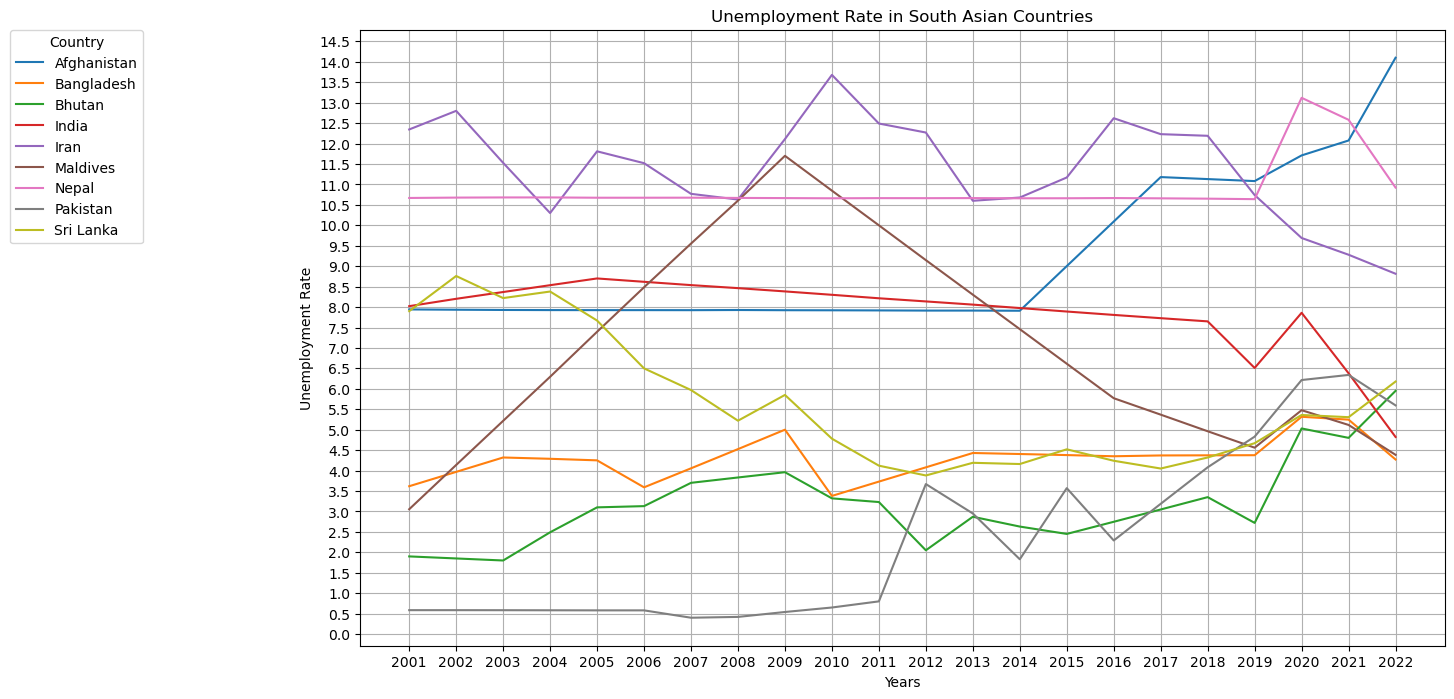

In [63]:
plt.figure(figsize=(14,8))  
plt.xlabel("Years")
plt.ylabel("Unemployment Rate")
plt.title("Unemployment Rate in South Asian Countries")
plt.xticks(range(ranged_data["Year"].min(), ranged_data["Year"].max()+1,1))
plt.yticks(np.arange(0, math.ceil(ranged_data["Unemployment, total (% of total labor force) (modeled ILO estimate)"].max()) + 0.5, 0.5))
plt.grid(True)
for country in south_asian_countries:
    country_data = ranged_data[ranged_data["Entity"] == country]
    plt.plot(country_data["Year"], country_data["Unemployment, total (% of total labor force) (modeled ILO estimate)"],label=country)

plt.legend(title="Country", bbox_to_anchor=(-0.2, 1), loc="upper right", borderaxespad=0)


In [17]:
#average unemployment in each country(2001-2022)
ranged_data.pivot_table(values="Unemployment, total (% of total labor force) (modeled ILO estimate)", index="Entity", aggfunc="mean").sort_values(by="Unemployment, total (% of total labor force) (modeled ILO estimate)", ascending=False)

,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
Entity,
Iran,11.375864
Nepal,10.877000
Afghanistan,9.150273
India,7.871182
Maldives,7.020364
Sri Lanka,5.647455
Bangladesh,4.287182
Bhutan,3.179818
Pakistan,2.311955


In [22]:
#average unemployment per year in South Asia(2001-2022)
ranged_data.pivot_table(values="Unemployment, total (% of total labor force) (modeled ILO estimate)", index="Year", aggfunc="mean").sort_values(by="Unemployment, total (% of total labor force) (modeled ILO estimate)", ascending=False)

,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
Year,
2020,7.753000
2021,7.458222
2009,7.348000
2022,7.226556
2010,7.060000
2018,6.967556
2008,6.921222
2005,6.900556
2017,6.869000


In [ ]:
ranged_data.pivot_table(values="Unemployment, total (% of total labor force) (modeled ILO estimate)", index="Year", columns="Entity")

Entity,Afghanistan,Bangladesh,Bhutan,India,Iran,Maldives,Nepal,Pakistan,Sri Lanka
Year,,,,,,,,,
2001,7.942,3.617,1.900,8.022,12.345,3.054,10.669,0.585,7.900
2002,7.935,3.968,1.850,8.202,12.800,4.137,10.678,0.585,8.760
2003,7.929,4.320,1.800,8.368,11.529,5.216,10.682,0.584,8.220
2004,7.926,4.288,2.490,8.535,10.300,6.294,10.682,0.582,8.380
2005,7.925,4.250,3.100,8.700,11.810,7.395,10.675,0.580,7.670
2006,7.925,3.590,3.130,8.618,11.520,8.484,10.675,0.580,6.500
2007,7.924,4.055,3.700,8.537,10.770,9.553,10.676,0.400,5.970
2008,7.928,4.525,3.831,8.463,10.630,10.604,10.670,0.420,5.220
2009,7.923,5.000,3.960,8.383,12.110,11.700,10.666,0.540,5.850
